In [1]:
# !pip install pandas
# !pip install numpy
# !pip install seaborn
# !pip install matplotlib
# !pip install xgboost
# !pip install lightgbm
# !pip install sklearn
!pip install catboost

# 라이브러리 임포트
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import xgboost
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, BaggingClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, RidgeCV, RidgeClassifier
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, GridSearchCV

import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

     |████████████████████████████████| 76.1 MB 1.6 MB/s 
Mounted at /content/drive


## 변수 설명
  - **int_rate** : 대출자에 부여된 이자율 (Interest rate of the loan the applicant received)
  - **annual_inc** : 연 소득 (annual income)
  - **dti** : 소득 대비 부채 비율 (Debt-to-income ratio)
  - **delinq_2yrs** : 지난 2년 간 체납 발생 횟수 (Delinquencies on lines of credit in the last 2 years)
  - **inq_last_6mths** : 지난 6개월 간 신용 조회 수 (Inquiries into the applicant's credit during the last 6 months)
  - **pub_rec** : 파산 횟수 (Number of bankruptcies listed in the public record)
  - **revol_bal** : 리볼빙 잔액 (Total credit revolving balance)
  - **total_acc** : 지금까지 소유했던 신용카드 개수 (num_total_cc_accounts : Total number of credit card accounts in the applicant's history)
  - **collections_12_mths_ex_med** : 의료부문을 제외한 지난 12개월 간 추심 발생 횟수 (num_collections_last_12m : Number of collections in the last 12 months. This excludes medical collections)
  - **acc_now_delinq** : 대출자가 체납 상태에 있지 않은 계좌의 수 (The number of accounts on which the borrower is now delinquent)
  - **tot_coll_amt** : 대출자에 대한 현재까지의 총 추심액 (total_collection_amount_ever : The total amount that the applicant has had against them in collections)
  - **tot_cur_bal** : 전 계좌의 현재 통합 잔고 (Total current balance of all accounts)
  - **chargeoff_within_12_mths** : 대출 부 신청인의 대출 신청 직전 12개월 간 세금 공제 횟수 (Number of charge-offs within last 12 months at time of application for the secondary applicant)
  - **delinq_amnt** : 체납 금액 (delinquency amount)
  - **tax_liens** : 세금 저당권의 수 (Number of tax liens)
  - **emp_length1 ~ 12** : 고용 연수 (Number of years in the job)
  - **home_ownership1 ~ 6** : 대출 신청자의 주거 소유 형태 (The ownership status of the applicant's residence)
  - **verification_status1 ~ 3** : 공동 소득 발생 여부 및 형태 (verification_income_joint : Type of verification of the joint income)
  - **purpose1 ~ 14** : 대출 목적 (The purpose of the loan)
  - **initial_list_status1 ~ 2** : 최초 대출 상태 (Initial listing status of the loan)
  - **mths_since_last_delinq1 ~ 11** : 마지막 체납이 지금으로부터 몇개월 전에 있었는지를 나타내는 변수 (Months since the last delinquency)
  
  - **funded_amnt** : 대출액 (Funded amount)
  - **funded_amnt_inv** : 사채 대출액 (Funded amount by investors)
  - **total_rec_late_fee** : 총 연체료 중 납부액 (Late fees received to date)
  - **term1** : 상환 기간 (The number of payments on the loan. Values are in months and can be either 36 or 60)
  - **open_acc** : 개설 개좌 수 (The number of open credit lines in the borrower's credit file)
  - **installment** : 대출 발생 시 월 상환액 (The monthly payment owed by the borrower if the loan originates)
  - **revol_util** : 리볼빙 한도 대비 리볼빙 사용 비율 (Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit)
  - **out_prncp** : 대출액 중 원리금 잔액 (Remaining outstanding principal for total amount funded)
  - **out_prncp_inv** : 사채 대출액 중 원리금 잔액 (Remaining outstanding principal for total amount funded by investors)
  - **total_rec_int** : 이자 상환액 (Interest received to date)
  - **fico_range_low** : FICO(일종의 신용점수) 최저값 (The lower boundary range the borrower’s FICO at loan origination belongs to)
  - **fico_range_high** : FICO(일종의 신용점수) 최고값 (The upper boundary range the borrower’s FICO at loan origination belongs to)
  
  - **depvar** : 고객의 부도 여부 (dependent variable)

In [90]:
df = pd.read_csv('/content/drive/MyDrive/모의경진대회/대부업체 고객 데이터 통한 채무 불이행 예측/data/train.csv')
df.head()

,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,chargeoff_within_12_mths,delinq_amnt,tax_liens,emp_length1,emp_length2,emp_length3,emp_length4,emp_length5,emp_length6,emp_length7,emp_length8,emp_length9,emp_length10,emp_length11,emp_length12,home_ownership1,home_ownership2,home_ownership3,home_ownership4,home_ownership5,home_ownership6,verification_status1,verification_status2,verification_status3,purpose1,purpose2,purpose3,purpose4,purpose5,purpose6,purpose7,purpose8,purpose9,purpose10,purpose11,purpose12,purpose13,purpose14,initial_list_status1,initial_list_status2,mths_since_last_delinq1,mths_since_last_delinq2,mths_since_last_delinq3,mths_since_last_delinq4,mths_since_last_delinq5,mths_since_last_delinq6,mths_since_last_delinq7,mths_since_last_delinq8,mths_since_last_delinq9,mths_since_last_delinq10,mths_since_last_delinq11,funded_amnt,funded_amnt_inv,total_rec_late_fee,term1,open_acc,installment,revol_util,out_prncp,out_prncp_inv,total_rec_int,fico_range_low,fico_range_high,depvar
0,0.0824,21000.0,29.19,0,1,0,3016,26,0,0,0,11773,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1200,1200.0,0.0,1,18,37.74,0.076,0.0,0.0,157.94,765,769,0
1,0.1299,80000.0,4.82,0,1,1,5722,24,0,0,0,21875,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,8000,8000.0,0.0,1,8,269.52,0.447,0.0,0.0,1702.42,665,669,0
2,0.1299,38000.0,23.66,0,3,0,6511,18,0,0,0,31868,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,5000,5000.0,0.0,1,7,168.45,0.880,0.0,0.0,1066.64,670,674,0
3,0.1367,100000.0,16.27,4,2,0,6849,30,0,0,0,326049,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,15000,15000.0,0.0,1,12,510.27,0.457,0.0,0.0,1256.24,680,684,1
4,0.1269,30000.0,25.28,0,1,2,8197,12,0,0,2506,8840,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,10000,10000.0,0.0,1,8,335.45,0.416,0.0,0.0,871.04,660,664,1


In [91]:
# 결측치 확인
# Trnaspose를 이용해 깔끔하게 보이게함.
pd.DataFrame(df.isna().sum()).rename(columns={0:'Non-Null Count'}).T

,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,chargeoff_within_12_mths,delinq_amnt,tax_liens,emp_length1,emp_length2,emp_length3,emp_length4,emp_length5,emp_length6,emp_length7,emp_length8,emp_length9,emp_length10,emp_length11,emp_length12,home_ownership1,home_ownership2,home_ownership3,home_ownership4,home_ownership5,home_ownership6,verification_status1,verification_status2,verification_status3,purpose1,purpose2,purpose3,purpose4,purpose5,purpose6,purpose7,purpose8,purpose9,purpose10,purpose11,purpose12,purpose13,purpose14,initial_list_status1,initial_list_status2,mths_since_last_delinq1,mths_since_last_delinq2,mths_since_last_delinq3,mths_since_last_delinq4,mths_since_last_delinq5,mths_since_last_delinq6,mths_since_last_delinq7,mths_since_last_delinq8,mths_since_last_delinq9,mths_since_last_delinq10,mths_since_last_delinq11,funded_amnt,funded_amnt_inv,total_rec_late_fee,term1,open_acc,installment,revol_util,out_prncp,out_prncp_inv,total_rec_int,fico_range_low,fico_range_high,depvar
Non-Null Count,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Feature engineering
1. test data도 불러와 같이 설정해줘야함
2. 중복된 것은 제거하고 비슷한 피처끼리 합침.
3. 파생 변수를 만들어준다. <br>
원리금 이자액(prncp) = 소득 대비 부채비율(dti) * 연 소득(annual_inc) / 100 <br>
대출 이자액(loan_interst) = 대출금(funded_amnt) * 이자율(int_rate) <br>
3. 그전에 feature마다 제대로 된 feature인지 확인해봐야한다


In [92]:
# test date 불러오기
# df = train, df2 = test
df2 = pd.read_csv('/content/drive/MyDrive/모의경진대회/대부업체 고객 데이터 통한 채무 불이행 예측/data/test.csv')
df2

,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,chargeoff_within_12_mths,delinq_amnt,tax_liens,emp_length1,emp_length2,emp_length3,emp_length4,emp_length5,emp_length6,emp_length7,emp_length8,emp_length9,emp_length10,emp_length11,emp_length12,home_ownership1,home_ownership2,home_ownership3,home_ownership4,home_ownership5,home_ownership6,verification_status1,verification_status2,verification_status3,purpose1,purpose2,purpose3,purpose4,purpose5,purpose6,purpose7,purpose8,purpose9,purpose10,purpose11,purpose12,purpose13,purpose14,initial_list_status1,initial_list_status2,mths_since_last_delinq1,mths_since_last_delinq2,mths_since_last_delinq3,mths_since_last_delinq4,mths_since_last_delinq5,mths_since_last_delinq6,mths_since_last_delinq7,mths_since_last_delinq8,mths_since_last_delinq9,mths_since_last_delinq10,mths_since_last_delinq11,funded_amnt,funded_amnt_inv,total_rec_late_fee,term1,open_acc,installment,revol_util,out_prncp,out_prncp_inv,total_rec_int,fico_range_low,fico_range_high,ID
0,0.1449,16380.0,26.08,0,0,1,3486,10,0,0,0,9214,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,8100,8100.0,0.00,1,4,278.78,0.311,0.0,0.0,460.40,700,704,0
1,0.1899,65000.0,13.97,0,0,0,25305,20,0,0,0,115612,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,20000,20000.0,0.00,0,10,518.71,0.885,0.0,0.0,4866.68,675,679,1
2,0.1049,53000.0,23.28,0,0,0,10910,21,0,0,0,33017,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,10000,10000.0,16.25,1,7,324.98,0.580,0.0,0.0,1451.06,675,679,2
3,0.1757,71800.0,30.32,0,0,0,42423,26,0,0,0,152515,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,27200,27200.0,0.00,0,16,684.36,0.701,0.0,0.0,7068.11,665,669,3
4,0.2020,50000.0,25.61,0,2,0,21703,24,0,0,0,135282,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,22000,22000.0,0.00,0,13,585.32,0.622,0.0,0.0,7754.20,710,714,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35811,0.1049,110000.0,9.02,0,0,1,8991,33,0,0,0,17468,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,12000,12000.0,0.00,1,13,389.98,0.346,0.0,0.0,1406.13,665,669,35811
35812,0.0824,45000.0,32.56,1,0,0,20966,29,0,0,0,24802,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,5000,5000.0,0.00,1,9,157.24,0.690,0.0,0.0,495.70,705,709,35812
35813,0.1368,49000.0,17.60,0,0,0,5597,7,0,0,0,20691,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,6000,6000.0,0.00,1,7,204.14,0.333,0.0,0.0,1355.06,705,709,35813
35814,0.1139,84852.0,9.96,0,0,1,7184,13,0,0,0,31396,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,10000,10000.0,0.00,1,8,329.24,0.352,0.0,0.0,1615.15,725,729,35814


In [93]:
# funded_amnt와 funded_amnt_inv / out_prncp 와 out_prncp_inv 는 중복이 되므로 하나는 제거한다.
df = df.drop(['funded_amnt_inv', 'out_prncp_inv'], axis=1)
df2 = df2.drop(['funded_amnt_inv', 'out_prncp_inv'], axis=1)
df

,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,chargeoff_within_12_mths,delinq_amnt,tax_liens,emp_length1,emp_length2,emp_length3,emp_length4,emp_length5,emp_length6,emp_length7,emp_length8,emp_length9,emp_length10,emp_length11,emp_length12,home_ownership1,home_ownership2,home_ownership3,home_ownership4,home_ownership5,home_ownership6,verification_status1,verification_status2,verification_status3,purpose1,purpose2,purpose3,purpose4,purpose5,purpose6,purpose7,purpose8,purpose9,purpose10,purpose11,purpose12,purpose13,purpose14,initial_list_status1,initial_list_status2,mths_since_last_delinq1,mths_since_last_delinq2,mths_since_last_delinq3,mths_since_last_delinq4,mths_since_last_delinq5,mths_since_last_delinq6,mths_since_last_delinq7,mths_since_last_delinq8,mths_since_last_delinq9,mths_since_last_delinq10,mths_since_last_delinq11,funded_amnt,total_rec_late_fee,term1,open_acc,installment,revol_util,out_prncp,total_rec_int,fico_range_low,fico_range_high,depvar
0,0.0824,21000.0,29.19,0,1,0,3016,26,0,0,0,11773,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1200,0.0,1,18,37.74,0.076,0.0,157.94,765,769,0
1,0.1299,80000.0,4.82,0,1,1,5722,24,0,0,0,21875,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,8000,0.0,1,8,269.52,0.447,0.0,1702.42,665,669,0
2,0.1299,38000.0,23.66,0,3,0,6511,18,0,0,0,31868,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,5000,0.0,1,7,168.45,0.880,0.0,1066.64,670,674,0
3,0.1367,100000.0,16.27,4,2,0,6849,30,0,0,0,326049,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,15000,0.0,1,12,510.27,0.457,0.0,1256.24,680,684,1
4,0.1269,30000.0,25.28,0,1,2,8197,12,0,0,2506,8840,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,10000,0.0,1,8,335.45,0.416,0.0,871.04,660,664,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.1757,65000.0,17.67,0,3,1,11255,21,1,0,0,26570,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,20000,0.0,1,13,718.75,0.780,0.0,5373.29,660,664,1
99996,0.0890,65000.0,2.88,0,0,0,2105,12,0,0,0,6138,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,6000,0.0,1,7,190.52,0.120,0.0,835.66,765,769,0
99997,0.1349,46000.0,32.12,0,1,0,8998,20,0,0,0,96531,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,6400,0.0,1,19,217.16,0.643,0.0,1261.67,665,669,0
99998,0.2115,31000.0,4.53,0,1,0,3875,4,0,0,0,3875,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,5500,0.0,1,3,207.64,0.731,0.0,1357.69,710,714,1


### 비슷한 컬럼 합치기

In [94]:
#emp_length1 ~ 12
df['emp_length'] = 0

for idx, column in enumerate(df.loc[:,'emp_length1':'emp_length12'].columns,1):
  for i, data in enumerate(df[column]):
    if data == 1:
      df['emp_length'][i] = idx

df = df.drop(df.loc[:,'emp_length1':'emp_length12'].columns, axis=1)

In [95]:
#home_ownership1 ~ 6
df['home_ownership'] = 0

for idx, column in enumerate(df.loc[:,'home_ownership1':'home_ownership6'].columns,1):
    for i, data in enumerate(df[column]):
        if data == 1:
            df['home_ownership'][i] = idx

df = df.drop(df.loc[:,'home_ownership1':'home_ownership6'].columns, axis=1)

In [96]:
#verification_status1 ~ 3
df['verification_status'] = 0

for idx, column in enumerate(df.loc[:,'verification_status1':'verification_status3'].columns,1):
    for i, data in enumerate(df[column]):
        if data == 1:
            df['verification_status'][i] = idx

df = df.drop(df.loc[:,'verification_status1':'verification_status3'].columns, axis=1)

In [97]:
#purpose1 ~ 14
df['purpose'] = 0

for idx, column in enumerate(df.loc[:,'purpose1':'purpose14'].columns,1):
    for i, data in enumerate(df[column]):
        if data == 1:
            df['purpose'][i] = idx

df = df.drop(df.loc[:,'purpose1':'purpose14'].columns, axis=1)

In [98]:
#initial_list_status1 ~ 2
df['initial_list_status'] = 0

for idx, column in enumerate(df.loc[:,'initial_list_status1':'initial_list_status2'].columns,1):
    for i, data in enumerate(df[column]):
        if data == 1:
            df['initial_list_status'][i] = idx
            
df = df.drop(df.loc[:,'initial_list_status1':'initial_list_status2'].columns, axis=1)

In [99]:
#mths_since_last_delinq1 ~ 11
df['mths_since_last_delinq'] = 0

for idx, column in enumerate(df.loc[:,'mths_since_last_delinq1':'mths_since_last_delinq11'].columns,1):
    for i, data in enumerate(df[column]):
        if data == 1:
            df['mths_since_last_delinq'][i] = idx

df = df.drop(df.loc[:,'mths_since_last_delinq1':'mths_since_last_delinq11'].columns, axis=1)

In [100]:
df

,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,chargeoff_within_12_mths,delinq_amnt,tax_liens,funded_amnt,total_rec_late_fee,term1,open_acc,installment,revol_util,out_prncp,total_rec_int,fico_range_low,fico_range_high,depvar,emp_length,home_ownership,verification_status,purpose,initial_list_status,mths_since_last_delinq
0,0.0824,21000.0,29.19,0,1,0,3016,26,0,0,0,11773,0,0,0,1200,0.0,1,18,37.74,0.076,0.0,157.94,765,769,0,1,6,2,2,2,1
1,0.1299,80000.0,4.82,0,1,1,5722,24,0,0,0,21875,0,0,0,8000,0.0,1,8,269.52,0.447,0.0,1702.42,665,669,0,2,6,3,3,2,1
2,0.1299,38000.0,23.66,0,3,0,6511,18,0,0,0,31868,0,0,0,5000,0.0,1,7,168.45,0.880,0.0,1066.64,670,674,0,4,6,2,3,2,11
3,0.1367,100000.0,16.27,4,2,0,6849,30,0,0,0,326049,0,0,0,15000,0.0,1,12,510.27,0.457,0.0,1256.24,680,684,1,3,2,3,3,2,5
4,0.1269,30000.0,25.28,0,1,2,8197,12,0,0,2506,8840,0,0,0,10000,0.0,1,8,335.45,0.416,0.0,871.04,660,664,1,4,6,2,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.1757,65000.0,17.67,0,3,1,11255,21,1,0,0,26570,0,0,0,20000,0.0,1,13,718.75,0.780,0.0,5373.29,660,664,1,7,6,3,3,2,1
99996,0.0890,65000.0,2.88,0,0,0,2105,12,0,0,0,6138,0,0,0,6000,0.0,1,7,190.52,0.120,0.0,835.66,765,769,0,11,6,2,3,1,1
99997,0.1349,46000.0,32.12,0,1,0,8998,20,0,0,0,96531,0,0,0,6400,0.0,1,19,217.16,0.643,0.0,1261.67,665,669,0,4,6,1,2,2,1
99998,0.2115,31000.0,4.53,0,1,0,3875,4,0,0,0,3875,0,0,0,5500,0.0,1,3,207.64,0.731,0.0,1357.69,710,714,1,12,6,3,10,2,1


### test도 비슷한 컬럼 합치기

In [101]:
#emp_length1 ~ 12
df2['emp_length'] = 0

for idx, column in enumerate(df2.loc[:,'emp_length1':'emp_length12'].columns,1):
  for i, data in enumerate(df2[column]):
    if data == 1:
      df2['emp_length'][i] = idx

df2 = df2.drop(df2.loc[:,'emp_length1':'emp_length12'].columns, axis=1)

#home_ownership1 ~ 6
df2['home_ownership'] = 0

for idx, column in enumerate(df2.loc[:,'home_ownership1':'home_ownership6'].columns,1):
    for i, data in enumerate(df2[column]):
        if data == 1:
            df2['home_ownership'][i] = idx

df2 = df2.drop(df2.loc[:,'home_ownership1':'home_ownership6'].columns, axis=1)

#verification_status1 ~ 3
df2['verification_status'] = 0

for idx, column in enumerate(df2.loc[:,'verification_status1':'verification_status3'].columns,1):
    for i, data in enumerate(df2[column]):
        if data == 1:
            df2['verification_status'][i] = idx

df2 = df2.drop(df2.loc[:,'verification_status1':'verification_status3'].columns, axis=1)

#purpose1 ~ 14
df2['purpose'] = 0

for idx, column in enumerate(df2.loc[:,'purpose1':'purpose14'].columns,1):
    for i, data in enumerate(df2[column]):
        if data == 1:
            df2['purpose'][i] = idx

df2 = df2.drop(df2.loc[:,'purpose1':'purpose14'].columns, axis=1)

#initial_list_status1 ~ 2
df2['initial_list_status'] = 0

for idx, column in enumerate(df2.loc[:,'initial_list_status1':'initial_list_status2'].columns,1):
    for i, data in enumerate(df2[column]):
        if data == 1:
            df2['initial_list_status'][i] = idx
            
df2 = df2.drop(df2.loc[:,'initial_list_status1':'initial_list_status2'].columns, axis=1)

#mths_since_last_delinq1 ~ 11
df2['mths_since_last_delinq'] = 0

for idx, column in enumerate(df2.loc[:,'mths_since_last_delinq1':'mths_since_last_delinq11'].columns,1):
    for i, data in enumerate(df2[column]):
        if data == 1:
            df2['mths_since_last_delinq'][i] = idx

df2 = df2.drop(df2.loc[:,'mths_since_last_delinq1':'mths_since_last_delinq11'].columns, axis=1)

In [102]:
df2

,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,chargeoff_within_12_mths,delinq_amnt,tax_liens,funded_amnt,total_rec_late_fee,term1,open_acc,installment,revol_util,out_prncp,total_rec_int,fico_range_low,fico_range_high,ID,emp_length,home_ownership,verification_status,purpose,initial_list_status,mths_since_last_delinq
0,0.1449,16380.0,26.08,0,0,1,3486,10,0,0,0,9214,0,0,0,8100,0.00,1,4,278.78,0.311,0.0,460.40,700,704,0,7,6,1,3,2,1
1,0.1899,65000.0,13.97,0,0,0,25305,20,0,0,0,115612,0,0,0,20000,0.00,0,10,518.71,0.885,0.0,4866.68,675,679,1,2,2,2,3,2,7
2,0.1049,53000.0,23.28,0,0,0,10910,21,0,0,0,33017,0,0,0,10000,16.25,1,7,324.98,0.580,0.0,1451.06,675,679,2,11,6,2,3,2,7
3,0.1757,71800.0,30.32,0,0,0,42423,26,0,0,0,152515,0,0,0,27200,0.00,0,16,684.36,0.701,0.0,7068.11,665,669,3,2,2,3,3,2,1
4,0.2020,50000.0,25.61,0,2,0,21703,24,0,0,0,135282,0,0,0,22000,0.00,0,13,585.32,0.622,0.0,7754.20,710,714,4,2,2,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35811,0.1049,110000.0,9.02,0,0,1,8991,33,0,0,0,17468,0,0,0,12000,0.00,1,13,389.98,0.346,0.0,1406.13,665,669,35811,2,2,1,3,2,1
35812,0.0824,45000.0,32.56,1,0,0,20966,29,0,0,0,24802,0,0,0,5000,0.00,1,9,157.24,0.690,0.0,495.70,705,709,35812,1,6,2,2,2,3
35813,0.1368,49000.0,17.60,0,0,0,5597,7,0,0,0,20691,0,0,0,6000,0.00,1,7,204.14,0.333,0.0,1355.06,705,709,35813,3,6,1,2,1,1
35814,0.1139,84852.0,9.96,0,0,1,7184,13,0,0,0,31396,0,0,0,10000,0.00,1,8,329.24,0.352,0.0,1615.15,725,729,35814,3,6,1,3,2,1


In [103]:
#원리금 이자액(prncp) 컬럼 생성
df['prncp'] = df['dti'] * df['annual_inc'] / 100
df2['prncp'] = df2['dti'] * df2['annual_inc'] /100
df

,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,chargeoff_within_12_mths,delinq_amnt,tax_liens,funded_amnt,total_rec_late_fee,term1,open_acc,installment,revol_util,out_prncp,total_rec_int,fico_range_low,fico_range_high,depvar,emp_length,home_ownership,verification_status,purpose,initial_list_status,mths_since_last_delinq,prncp
0,0.0824,21000.0,29.19,0,1,0,3016,26,0,0,0,11773,0,0,0,1200,0.0,1,18,37.74,0.076,0.0,157.94,765,769,0,1,6,2,2,2,1,6129.9
1,0.1299,80000.0,4.82,0,1,1,5722,24,0,0,0,21875,0,0,0,8000,0.0,1,8,269.52,0.447,0.0,1702.42,665,669,0,2,6,3,3,2,1,3856.0
2,0.1299,38000.0,23.66,0,3,0,6511,18,0,0,0,31868,0,0,0,5000,0.0,1,7,168.45,0.880,0.0,1066.64,670,674,0,4,6,2,3,2,11,8990.8
3,0.1367,100000.0,16.27,4,2,0,6849,30,0,0,0,326049,0,0,0,15000,0.0,1,12,510.27,0.457,0.0,1256.24,680,684,1,3,2,3,3,2,5,16270.0
4,0.1269,30000.0,25.28,0,1,2,8197,12,0,0,2506,8840,0,0,0,10000,0.0,1,8,335.45,0.416,0.0,871.04,660,664,1,4,6,2,3,2,1,7584.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.1757,65000.0,17.67,0,3,1,11255,21,1,0,0,26570,0,0,0,20000,0.0,1,13,718.75,0.780,0.0,5373.29,660,664,1,7,6,3,3,2,1,11485.5
99996,0.0890,65000.0,2.88,0,0,0,2105,12,0,0,0,6138,0,0,0,6000,0.0,1,7,190.52,0.120,0.0,835.66,765,769,0,11,6,2,3,1,1,1872.0
99997,0.1349,46000.0,32.12,0,1,0,8998,20,0,0,0,96531,0,0,0,6400,0.0,1,19,217.16,0.643,0.0,1261.67,665,669,0,4,6,1,2,2,1,14775.2
99998,0.2115,31000.0,4.53,0,1,0,3875,4,0,0,0,3875,0,0,0,5500,0.0,1,3,207.64,0.731,0.0,1357.69,710,714,1,12,6,3,10,2,1,1404.3


In [104]:
# 대출 이자액(loan_interst) 컬럼 생성
df['loan_interst'] = df['funded_amnt'] * df['int_rate']
df2['loan_interst'] = df2['funded_amnt'] * df2['int_rate']
df

,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,chargeoff_within_12_mths,delinq_amnt,tax_liens,funded_amnt,total_rec_late_fee,term1,open_acc,installment,revol_util,out_prncp,total_rec_int,fico_range_low,fico_range_high,depvar,emp_length,home_ownership,verification_status,purpose,initial_list_status,mths_since_last_delinq,prncp,loan_interst
0,0.0824,21000.0,29.19,0,1,0,3016,26,0,0,0,11773,0,0,0,1200,0.0,1,18,37.74,0.076,0.0,157.94,765,769,0,1,6,2,2,2,1,6129.9,98.8800
1,0.1299,80000.0,4.82,0,1,1,5722,24,0,0,0,21875,0,0,0,8000,0.0,1,8,269.52,0.447,0.0,1702.42,665,669,0,2,6,3,3,2,1,3856.0,1039.2000
2,0.1299,38000.0,23.66,0,3,0,6511,18,0,0,0,31868,0,0,0,5000,0.0,1,7,168.45,0.880,0.0,1066.64,670,674,0,4,6,2,3,2,11,8990.8,649.5000
3,0.1367,100000.0,16.27,4,2,0,6849,30,0,0,0,326049,0,0,0,15000,0.0,1,12,510.27,0.457,0.0,1256.24,680,684,1,3,2,3,3,2,5,16270.0,2050.5000
4,0.1269,30000.0,25.28,0,1,2,8197,12,0,0,2506,8840,0,0,0,10000,0.0,1,8,335.45,0.416,0.0,871.04,660,664,1,4,6,2,3,2,1,7584.0,1269.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.1757,65000.0,17.67,0,3,1,11255,21,1,0,0,26570,0,0,0,20000,0.0,1,13,718.75,0.780,0.0,5373.29,660,664,1,7,6,3,3,2,1,11485.5,3514.0000
99996,0.0890,65000.0,2.88,0,0,0,2105,12,0,0,0,6138,0,0,0,6000,0.0,1,7,190.52,0.120,0.0,835.66,765,769,0,11,6,2,3,1,1,1872.0,534.0000
99997,0.1349,46000.0,32.12,0,1,0,8998,20,0,0,0,96531,0,0,0,6400,0.0,1,19,217.16,0.643,0.0,1261.67,665,669,0,4,6,1,2,2,1,14775.2,863.3600
99998,0.2115,31000.0,4.53,0,1,0,3875,4,0,0,0,3875,0,0,0,5500,0.0,1,3,207.64,0.731,0.0,1357.69,710,714,1,12,6,3,10,2,1,1404.3,1163.2500


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 34 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   int_rate                    100000 non-null  float64
 1   annual_inc                  100000 non-null  float64
 2   dti                         100000 non-null  float64
 3   delinq_2yrs                 100000 non-null  int64  
 4   inq_last_6mths              100000 non-null  int64  
 5   pub_rec                     100000 non-null  int64  
 6   revol_bal                   100000 non-null  int64  
 7   total_acc                   100000 non-null  int64  
 8   collections_12_mths_ex_med  100000 non-null  int64  
 9   acc_now_delinq              100000 non-null  int64  
 10  tot_coll_amt                100000 non-null  int64  
 11  tot_cur_bal                 100000 non-null  int64  
 12  chargeoff_within_12_mths    100000 non-null  int64  
 13  delinq_amnt    

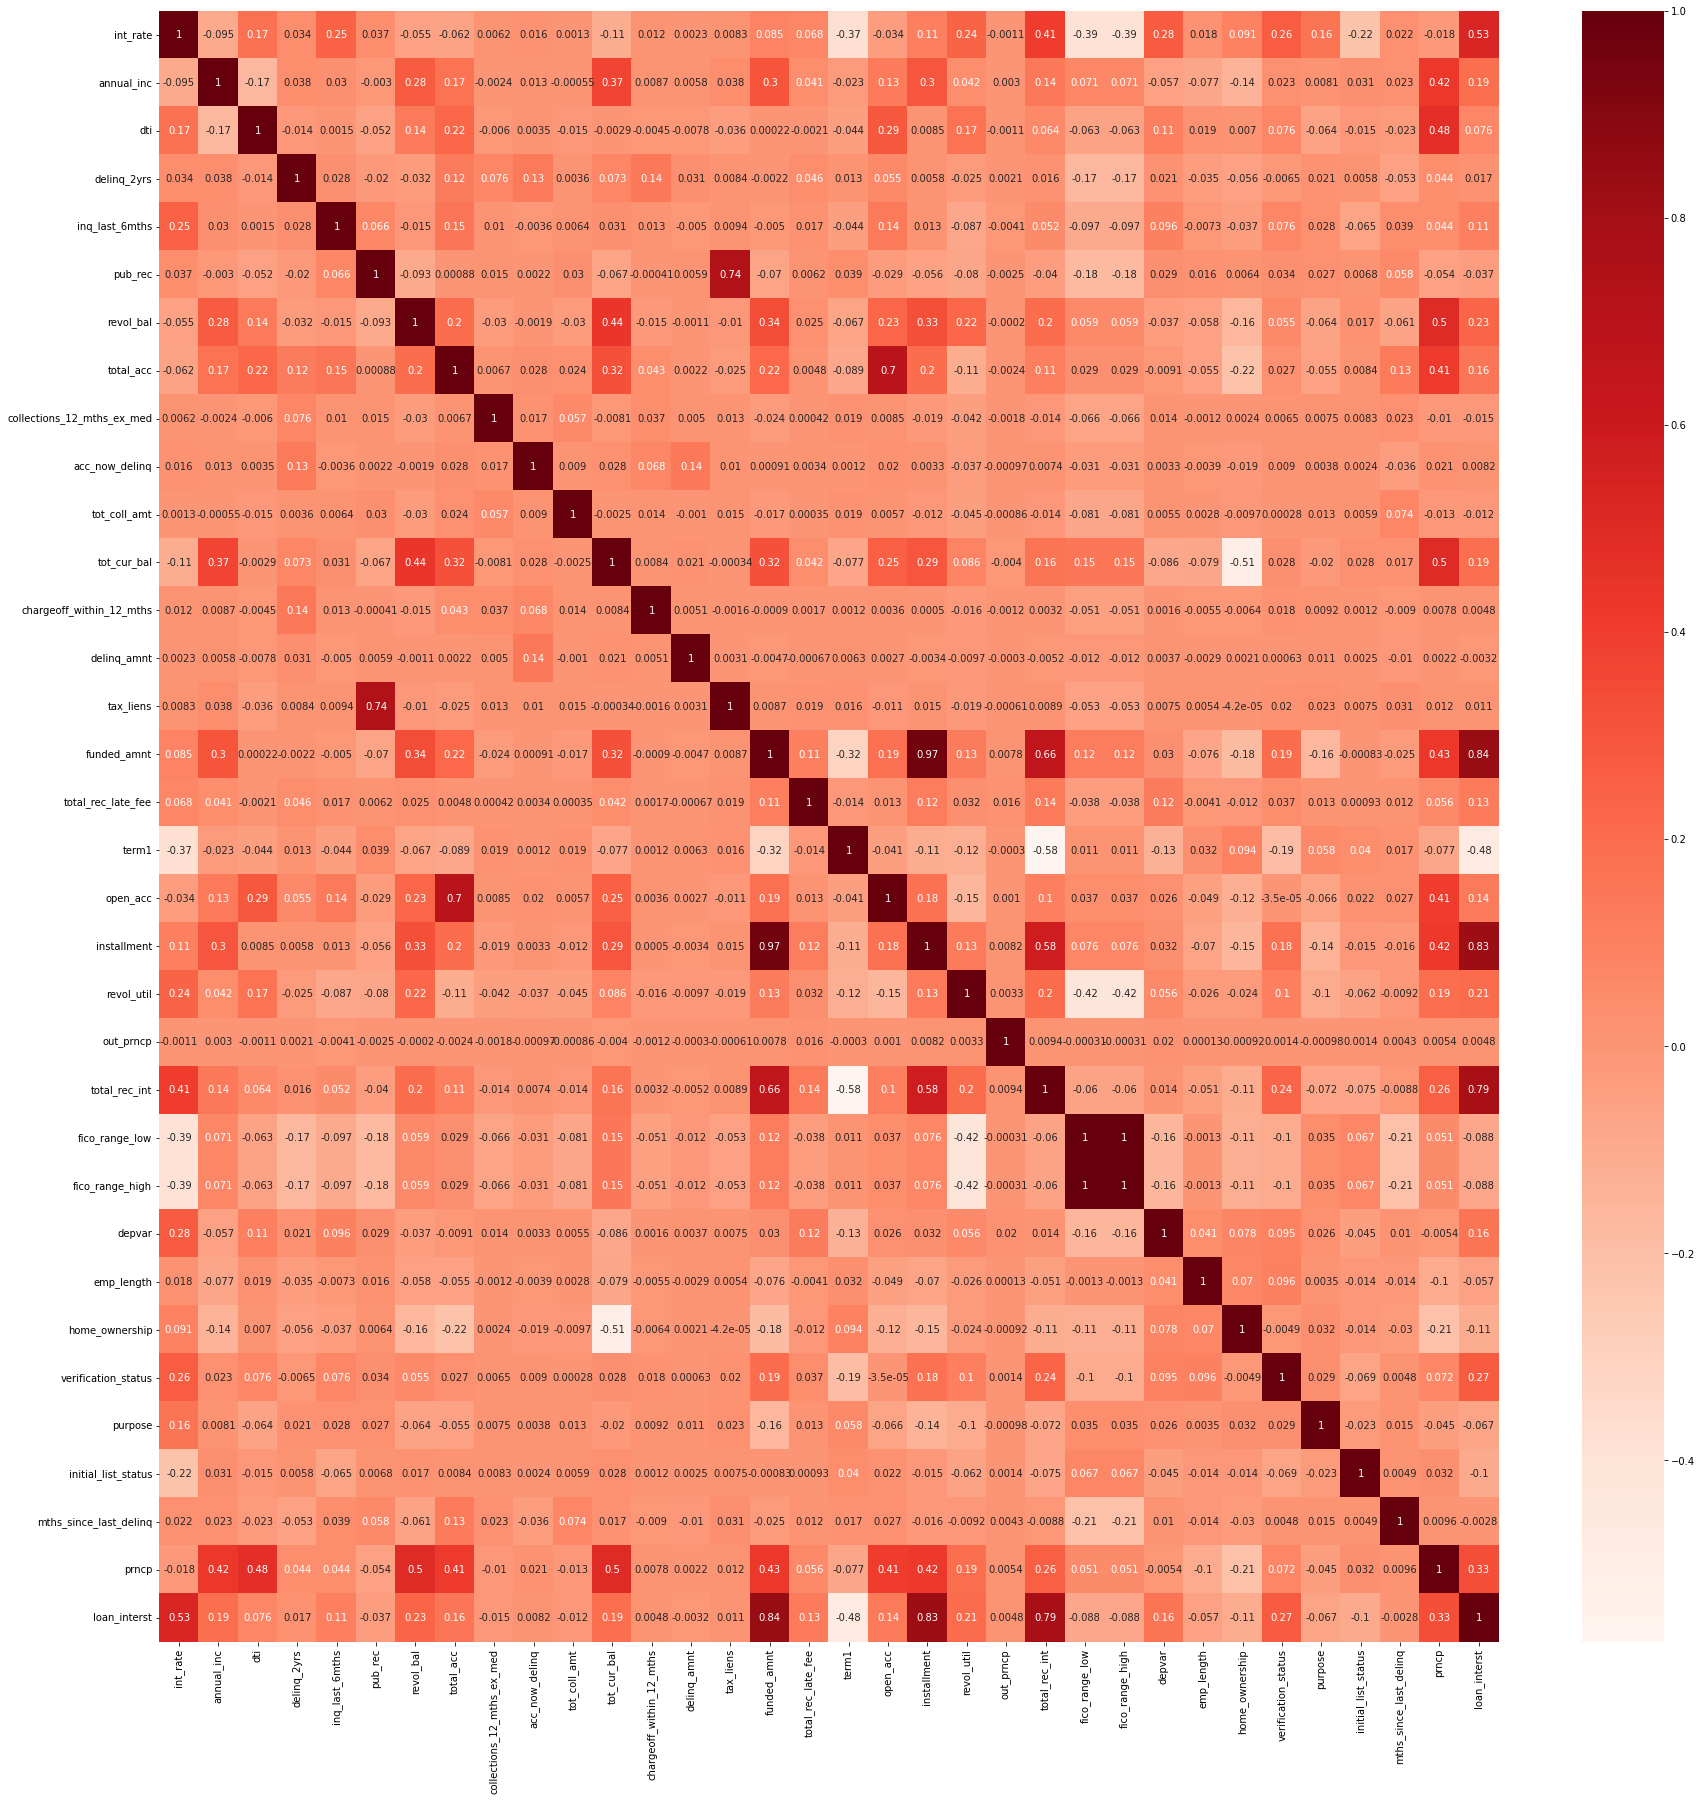

In [106]:
#상관관계 확인
plt.figure(figsize = (30,30))
sns.heatmap(df.corr(), annot=True, cmap='Reds')
plt.show()

# Train Valid Split

In [256]:
#데이터 프레임을 다시설정 한 후 학습해야함!
X = df.drop('depvar', axis=1)
y = df['depvar']

In [257]:
#data를 training set과 validation set으로 나누기
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

In [258]:
# training set과 validation set의 데이터 수 확인
print("training set length : ", len(X_train))
print("valid set length : ", len(X_valid))

training set length :  80000
valid set length :  20000


In [259]:
# validation set의 라벨 비율 확인
y_valid.sum() / len(y_valid)

0.32295

# Model

## 1. LightGBM

In [277]:
# 최적의 하이퍼 파라미터 찾기
lgb_clf = LGBMClassifier(tree_method= 'gpu_hist')

param_grid = {'max_depth':[10, 15, 20],
              'n_estimators':[150, 250, 350]
              }

cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=2)

grid_search = GridSearchCV(estimator=lgb_clf,
                           param_grid=param_grid, 
                           n_jobs=-1,
                           cv=cv,
                           scoring='f1_macro', 
                           error_score=0) 

results = grid_search.fit(X_train, y_train)

print("최적의 하이퍼 파라미터 : " ,results.best_params_)
print("최고 f1-score : {0:.4f}" .format(results.best_score_))

최적의 하이퍼 파라미터 :  {'max_depth': 15, 'n_estimators': 350}
최고 f1-score : 0.7055


In [278]:
# best parameter를 사용하여 prediction 수행
lgb_clf = LGBMClassifier(max_depth = results.best_params_['max_depth'],
                         n_estimators = results.best_params_['n_estimators'],
                         tree_method= 'gpu_hist'
                         )

lgb_clf.fit(X_train, y_train)

y_pred_lgb = lgb_clf.predict(X_valid)

In [279]:
# 평가 함수 정의
def get_clf_eval(y_actual, y_pred):
    accuracy = accuracy_score(y_actual, y_pred)
    precision = precision_score(y_actual, y_pred)
    recall = recall_score(y_actual, y_pred)
    AUC = roc_auc_score(y_actual, y_pred)
    F1 = f1_score(y_actual, y_pred, average='macro')
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('AUC: {:.4f}'.format(AUC))
    print('F1: {:.4f}'.format(F1))
    
    sns.heatmap(confusion_matrix(y_actual, y_pred), annot=True, fmt='d', cmap='YlGnBu')


정확도: 0.7523
정밀도: 0.6513
재현율: 0.5016
AUC: 0.6867
F1: 0.6967


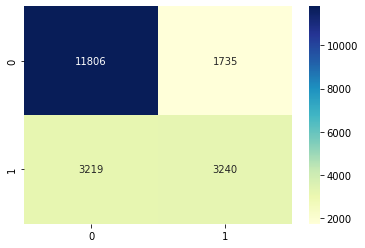

In [280]:
get_clf_eval(y_valid, y_pred_lgb)

In [281]:
# y_valid가 0 또는 1일 확률 출력
y_pred_prob = lgb_clf.predict_proba(X_valid)

print(len(y_pred_prob))
y_pred_prob

20000


array([[0.59993063, 0.40006937],
       [0.8939233 , 0.1060767 ],
       [0.73783077, 0.26216923],
       ...,
       [0.8339339 , 0.1660661 ],
       [0.63983873, 0.36016127],
       [0.29806828, 0.70193172]])


정확도: 0.7459
정밀도: 0.5953
재현율: 0.6656
AUC: 0.7249
F1: 0.7177


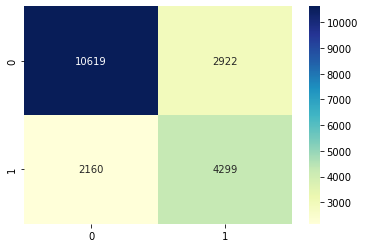

In [282]:
# threshold 변경 및 성능 확인
get_clf_eval(y_valid, y_pred_prob[:,1]>0.38)

## 2. Xgboost

In [283]:
# 하이퍼 파라미터 튜닝
xgb_clf = xgboost.XGBClassifier(tree_method='gpu_hist', predictor='gpu_predictor')

param_grid = {'max_depth':[5, 10, 20],
              'n_estimators':[100, 150]
              }

cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=2)

grid_search = GridSearchCV(estimator=xgb_clf,
                           param_grid=param_grid, 
                           n_jobs=-1,
                           cv=cv,
                           scoring='f1_macro', 
                           error_score=0) 

results=grid_search.fit(X_train, y_train)

results.best_params_

print("최적의 하이퍼 파라미터 : " ,results.best_params_)
print("최고 f1-score : {0:.4f}" .format(results.best_score_))

{'max_depth': 10, 'n_estimators': 150}

In [284]:
# best parameter를 사용하여 prediction 수행
xgb_clf = xgboost.XGBClassifier(max_depth = results.best_params_['max_depth'],
                                n_estimators = results.best_params_['n_estimators'],
                                eval_metric='logloss',
                                tree_method='gpu_hist',
                                predictor='gpu_predictor')

xgb_clf.fit(X_train, y_train)

y_pred_xgb = xgb_clf.predict(X_valid)


정확도: 0.7490
정밀도: 0.6439
재현율: 0.4985
AUC: 0.6835
F1: 0.6930


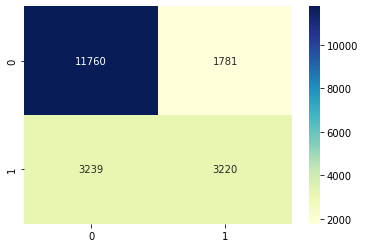

In [285]:
# xgboost 성능 확인
get_clf_eval(y_valid, y_pred_xgb)

In [286]:
# y_valid가 0 또는 1일 확률 출력
y_pred_prob = xgb_clf.predict_proba(X_valid)

print(len(y_pred_prob))
y_pred_prob

20000


array([[0.6710359 , 0.32896414],
       [0.8943096 , 0.10569043],
       [0.76014847, 0.23985153],
       ...,
       [0.86510444, 0.13489558],
       [0.6223909 , 0.37760907],
       [0.43055344, 0.56944656]], dtype=float32)


정확도: 0.7431
정밀도: 0.5916
재현율: 0.6608
AUC: 0.7216
F1: 0.7146


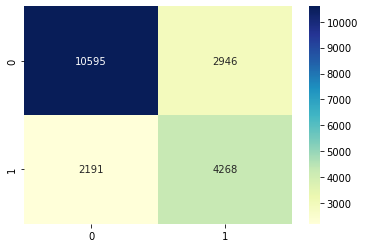

In [301]:
# threshold 변경 및 성능 확인
get_clf_eval(y_valid, y_pred_prob[:,1]>0.4)

## 3. Stacking


정확도: 0.7507
정밀도: 0.6434
재현율: 0.5115
AUC: 0.6882
F1: 0.6972


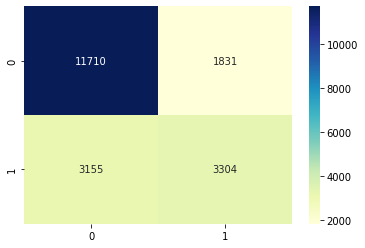

In [302]:
stacking_clf = StackingClassifier(estimators=[('lgbm', lgb_clf), ('xgb', xgb_clf)], final_estimator = LGBMClassifier())
stacking_clf.fit(X_train, y_train)
y_pred_stack = stacking_clf.predict(X_valid)

# ensemble(stacking) 성능 확인
get_clf_eval(y_valid, y_pred_stack)

In [303]:
# y_valid가 0 또는 1일 확률 출력
y_pred_prob = stacking_clf.predict_proba(X_valid)

print(len(y_pred_prob))
y_pred_prob

20000


array([[0.58530827, 0.41469173],
       [0.90896517, 0.09103483],
       [0.69515713, 0.30484287],
       ...,
       [0.85983962, 0.14016038],
       [0.61635977, 0.38364023],
       [0.34940911, 0.65059089]])


정확도: 0.7456
정밀도: 0.5940
재현율: 0.6702
AUC: 0.7259
F1: 0.7180


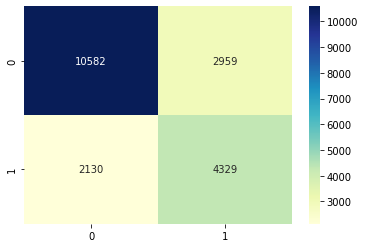

In [309]:
# threshold 변경 및 성능 확인
get_clf_eval(y_valid, y_pred_prob[:,1]>0.4)

In [291]:
df2

,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,chargeoff_within_12_mths,delinq_amnt,tax_liens,funded_amnt,total_rec_late_fee,term1,open_acc,installment,revol_util,out_prncp,total_rec_int,fico_range_low,fico_range_high,ID,emp_length,home_ownership,verification_status,purpose,initial_list_status,mths_since_last_delinq,prncp,loan_interst
0,0.1449,16380.0,26.08,0,0,1,3486,10,0,0,0,9214,0,0,0,8100,0.00,1,4,278.78,0.311,0.0,460.40,700,704,0,7,6,1,3,2,1,4271.9040,1173.69
1,0.1899,65000.0,13.97,0,0,0,25305,20,0,0,0,115612,0,0,0,20000,0.00,0,10,518.71,0.885,0.0,4866.68,675,679,1,2,2,2,3,2,7,9080.5000,3798.00
2,0.1049,53000.0,23.28,0,0,0,10910,21,0,0,0,33017,0,0,0,10000,16.25,1,7,324.98,0.580,0.0,1451.06,675,679,2,11,6,2,3,2,7,12338.4000,1049.00
3,0.1757,71800.0,30.32,0,0,0,42423,26,0,0,0,152515,0,0,0,27200,0.00,0,16,684.36,0.701,0.0,7068.11,665,669,3,2,2,3,3,2,1,21769.7600,4779.04
4,0.2020,50000.0,25.61,0,2,0,21703,24,0,0,0,135282,0,0,0,22000,0.00,0,13,585.32,0.622,0.0,7754.20,710,714,4,2,2,2,2,1,1,12805.0000,4444.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35811,0.1049,110000.0,9.02,0,0,1,8991,33,0,0,0,17468,0,0,0,12000,0.00,1,13,389.98,0.346,0.0,1406.13,665,669,35811,2,2,1,3,2,1,9922.0000,1258.80
35812,0.0824,45000.0,32.56,1,0,0,20966,29,0,0,0,24802,0,0,0,5000,0.00,1,9,157.24,0.690,0.0,495.70,705,709,35812,1,6,2,2,2,3,14652.0000,412.00
35813,0.1368,49000.0,17.60,0,0,0,5597,7,0,0,0,20691,0,0,0,6000,0.00,1,7,204.14,0.333,0.0,1355.06,705,709,35813,3,6,1,2,1,1,8624.0000,820.80
35814,0.1139,84852.0,9.96,0,0,1,7184,13,0,0,0,31396,0,0,0,10000,0.00,1,8,329.24,0.352,0.0,1615.15,725,729,35814,3,6,1,3,2,1,8451.2592,1139.00


In [310]:
# proba 형식 구하기(stack)
stack_pred = stacking_clf.predict_proba(df2.drop(columns=['ID']))
prob = (stack_pred[:,1]>0.4) 
print(prob)
arr = []
for i in prob:
  if i == True:
    i = 1
    arr.append(i)
  else:
    i = 0
    arr.append(i)

print(arr)
df_arr = pd.DataFrame(arr)
df_arr[0].to_numpy()

[ True  True  True ... False False False]
[1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 

array([1, 1, 1, ..., 0, 0, 0])

In [311]:
# 제출 양식 다운로드
submit = pd.read_csv('/content/drive/MyDrive/모의경진대회/대부업체 고객 데이터 통한 채무 불이행 예측/data/sample_submission.csv')

# prediction 수행
submit['answer'] = df_arr[0].to_numpy()

# 제출 파일 저장
submit.to_csv('/content/drive/MyDrive/모의경진대회/대부업체 고객 데이터 통한 채무 불이행 예측/data/25번_basic_stack3_submission.csv', index=False)